In [1]:
import seaborn as sns
# 미리설정할것
# graph 관련 warning 이 나오지 않게 세팅하기
import warnings
warnings.filterwarnings(action='ignore')
#warning이 원래 기본 세팅으로 변경하기 (기본세팅 = warning 표시)
#warnings.filterwarnings(action='default')
#2. 한글 폰트 설정
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# font를 나눔고딕으로 세팅 'NanumGothic' - windows
# plt.rcParams['font.family'] = 'NanumGothic'
# 맑은고딕 - windows
#plt.rcParams['font.family'] = 'Malgun Gothic'
# 애플고딕 - Mac OS
#plt.rcParams['font.family'] = 'AppleGothic'


# 8-4. 선 그래프 - 시간에 따라 달라지는 데이터 표현
- 선 그래프는 데이터를 선으로 표현한 그래프로, 시간에 따라 달라지는 데이터를 표현할 때 자주 사용한다

## Lab 1: 시계열 그래프 만들기 - econimics 데이터 분석
- econimics : 미국의 여러 경제 지표를 월별로 나타낸 그래프
- 시간에 따라 실업자 수가 어떻게 벼하는지 시계열 그래프를 만들어 보자

In [2]:
import pandas as pd
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

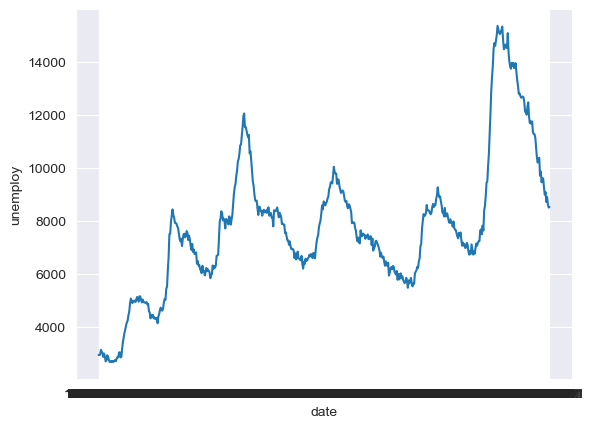

In [3]:
# lineplot()을 이용하여 선 그래프 작성
# x축 date에 여러 날짜가 겹쳐 출력됨
import seaborn as sns
#그래프 스타일
#style : whitegrid, darkgrid, ticks, white, dark
sns.set_style('darkgrid')
sns.lineplot(data = economics, x = 'date', y='unemploy')

### x축에 연도 표시하기

In [4]:
# x 축에 연도 표시
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


- 변수의 타입을 날짜 시간 타입으로 변경하여도 값이 달라지지 않음
- 날짜 시간 타입 데이터는 df.dt를 이용하여 연, 월, 일을 추출할 수 있음

In [5]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [6]:
# 연, 월, 일 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [7]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [8]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [9]:
# 연도 변수 추가하기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

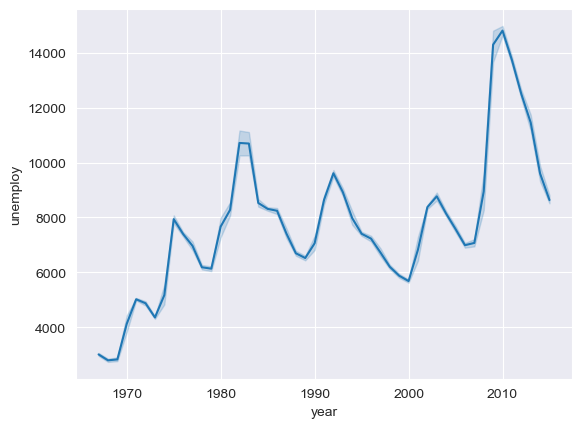

In [10]:
# x 축에 연도 표기
# 선은 추정 회귀선을 의미, 그림자는 신뢰구간을 표시 95% 
# (sampling을 통해서 얻어내는 값이라서 오차가 있을 수 있다
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

In [14]:
economics.query('year == 1982')['unemploy'].to_frame().describe()

,unemploy
count,12.000000
mean,10714.916667
std,856.415942
min,9397.000000
25%,10156.750000
50%,10693.500000
75%,11295.000000
max,12051.000000


<Axes: xlabel='year', ylabel='unemploy'>

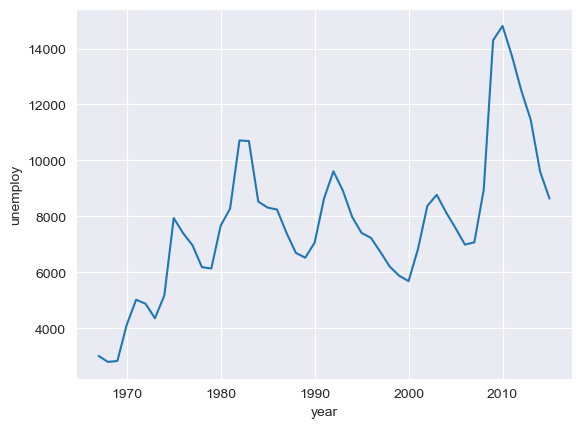

In [12]:
# x 축에 연도 표기 (선 위 아래 표시 면적은 신뢰구간, 오차가 존재할수 있는 구간을 표시
# ci = None은 deprecated 되었다. 대신 errorbar=None을 작성
#sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar=None)

- (그래프 분석) 실업자 수가 약 5년을 주기로 등락을 반복함
- 2005년 부터 급격히 증가 했다가 2010년 부터 다시 감소 추세

## Lab 2: 혼자서 해보기(economics 데이터 분석 그래프 만들기)
- economics 데이터에서 개인저축률(psavert)을 분석해 보기

Q1: psavert(개인 저축률)가 시간에 따라 어떻게 변해왔는지, 연도별 개인 저축률의 변화 그래프를 만들어 보자

- 데이터가 수집된 1970년부터 역 2005년 까지 지속적으로 개인 저축률이 감소하다가 2005년 부터 다시 증가하기 시작함

Q2: 2014년 월별 psavert(개인 저축률)의 변화를 시계열 그래프로 그려보세요
- df.query() 사용